### Data Collection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [2]:
bike_train = pd.read_csv('cbtrain.csv')
bike_test = pd.read_csv('cbtest.csv')



- datetime - hourly date + timestamp 
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -  1: Clear, Few clouds, Partly cloudy, Partly cloudy
          - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [3]:
bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike_train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [7]:
bike_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
bike_train.shape

(10886, 12)

In [9]:
bike_test.shape

(6493, 9)

In [19]:
#make them same columns???
bike_test['casual'] =np.nan
bike_test['registered']= np.nan
bike_test['count']= np.nan

In [11]:
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [12]:
bike_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [13]:
bike_test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
dtype: object

In [47]:
bike_train = pd.read_csv('cbtrain.csv')
bike_test = pd.read_csv('cbtest.csv')


Extracting the details of Datetime

In [50]:
def breakdown_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'], errors = 'coerce')
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['dow'] = df['datetime'].dt.weekday
    df['week'] = df['datetime'].dt.week
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['weekend'] = (df.dow >= 5).astype(int)

In [51]:
breakdown_datetime(bike_train)

In [53]:
bike_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,dow,week,month,year,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,5,52,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,5,52,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,5,52,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,5,52,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,5,52,1,2011,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,5,52,1,2011,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1,5,52,1,2011,1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1,5,52,1,2011,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1,5,52,1,2011,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1,5,52,1,2011,1


In [54]:

breakdown_datetime(bike_test)



In [55]:
bike_test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,dow,week,month,year,weekend
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,3,3,1,2011,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,3,3,1,2011,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,3,3,1,2011,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,3,3,1,2011,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,3,3,1,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19,31,0,1,12,2012,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20,31,0,1,12,2012,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21,31,0,1,12,2012,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22,31,0,1,12,2012,0


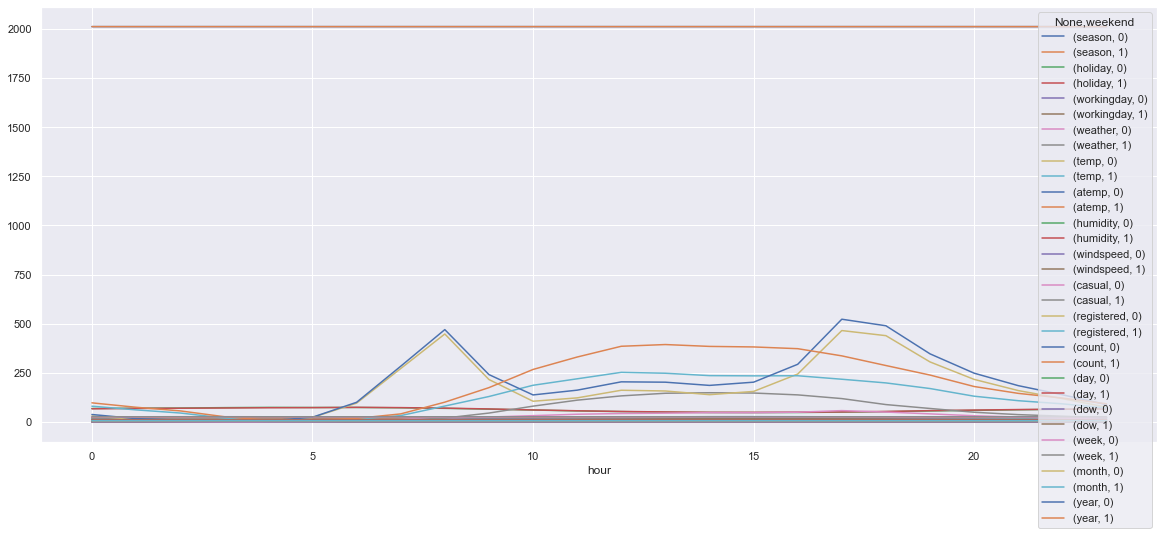

In [61]:
#Group by a time feature and observe grouped means
bike_train.groupby(['hour', 'weekend']).mean().unstack().plot(figsize=(20, 8))

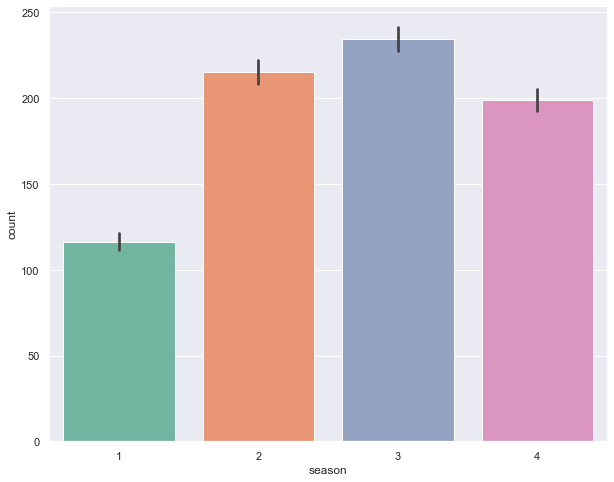

In [21]:
plt.figure(figsize = [10,8])


ax = sns.barplot(x="season", y="count", palette ="Set2" ,  data=bike_train)

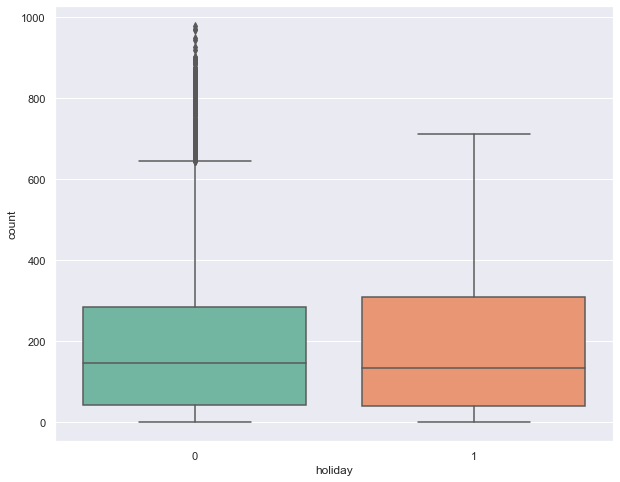

In [22]:
plt.figure(figsize = [10,8])

ax = sns.boxplot(x="holiday", y="count", palette ="Set2" ,data=bike_train)

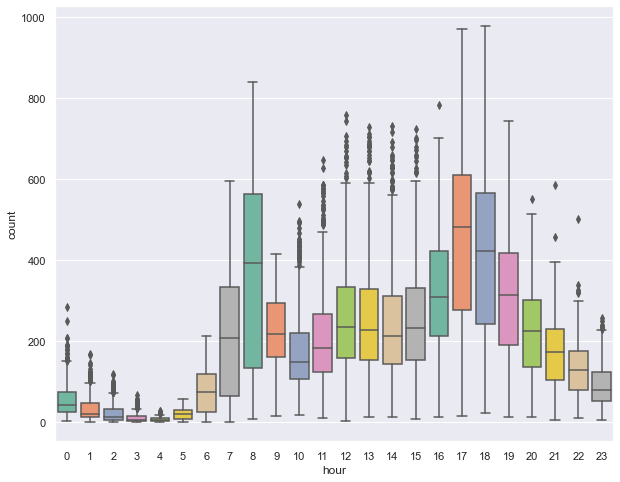

In [23]:
plt.figure(figsize = [10,8])
ax = sns.boxplot(x="hour", y="count", palette ="Set2" ,data=bike_train)

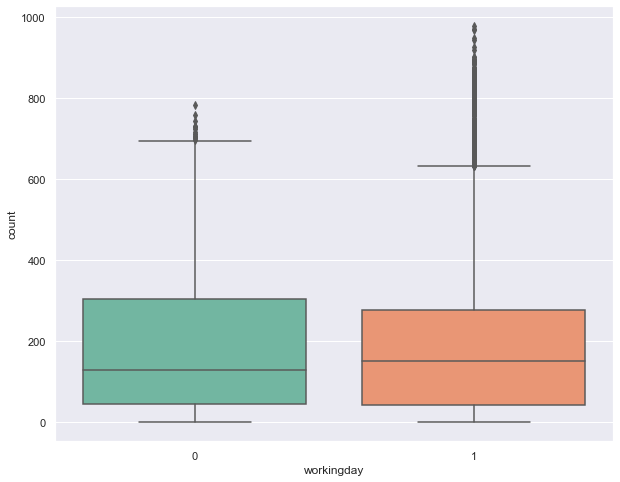

In [24]:
plt.figure(figsize = [10,8])

ax = sns.boxplot(x="workingday", y="count", palette ="Set2",data=bike_train)

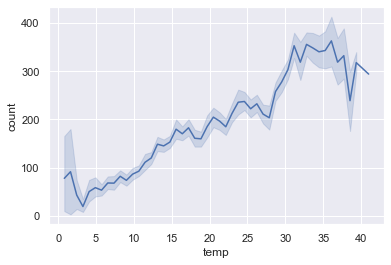

In [25]:
sns.lineplot(x="temp", y="count",  data=bike_train)

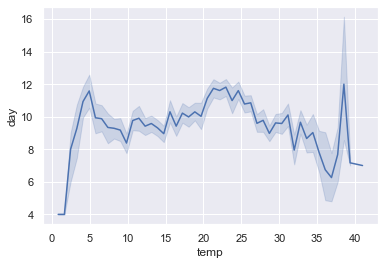

In [26]:
sns.lineplot(x="temp", y="day", data=bike_train)

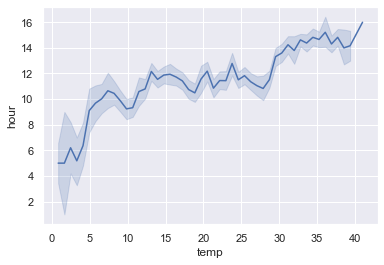

In [27]:
sns.lineplot(x="temp", y="hour", data=bike_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


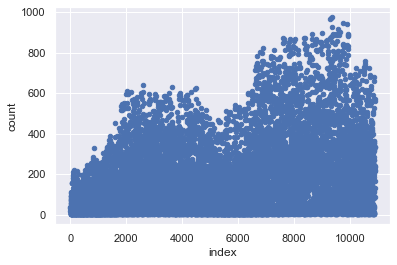

In [28]:
bike_train.reset_index().plot(kind='scatter', x='index', y='count')

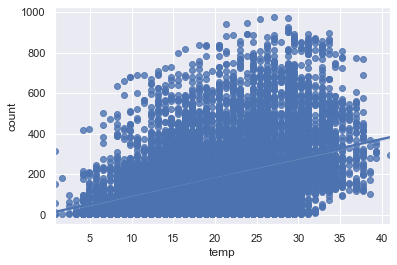

In [29]:
sns.regplot(x="temp", y="count", data=bike_train)

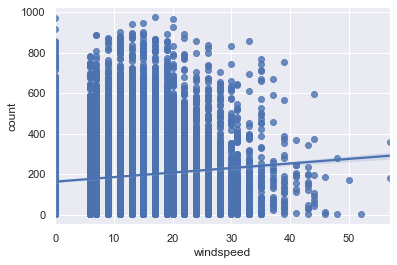

In [30]:
sns.regplot(x="windspeed", y="count", data=bike_train)

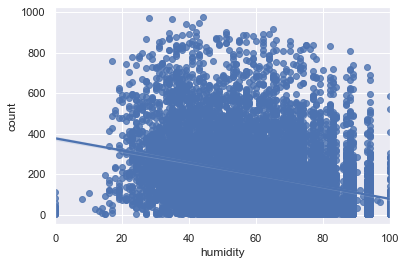

In [31]:
sns.regplot(x="humidity", y="count", data=bike_train)

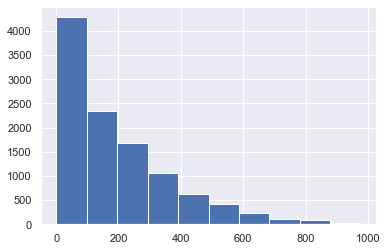

In [32]:
bike_train['count'].hist()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### 3. Train-test Split